# Titanic - Data analysis

In [197]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [198]:
train_df = pd.read_csv("train.csv", index_col="PassengerId")
test_df = pd.read_csv("test.csv", index_col="PassengerId")

print("Train DF: ")
print(train_df.describe())
print(train_df.dtypes)
print("---------")
print("Test DF: ")
print(test_df.describe())

Train DF: 
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object
---------
Test DF: 
           Pclass         Age    

In [199]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [201]:
# features 
features = [f for f in train_df.columns if f not in ['PassengerId', 'Survived']]
print(f"There are {len(features)} initial features.")
print(features)

There are 10 initial features.
['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


## Data distribution/correlation
### Survival / Age 

In [202]:
# useless
# sns.scatterplot(x=train_df['Age'], y=train_df['Survived'], hue=train_df['Pclass'])

# Survived age 
print(train_df.loc[train_df['Survived'] == 1, 'Age'].isnull().sum()) # 52 missing
print(train_df.loc[train_df['Survived'] == 1, 'Age'].describe())
print(train_df.loc[train_df['Survived'] == 0, 'Age'].isnull().sum()) # 125 missing 
print(train_df.loc[train_df['Survived'] == 0, 'Age'].describe())
# The stats for age for survived and died are very similar (no univariate correlation)

52
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64
125
count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64


### SibSp / Survived

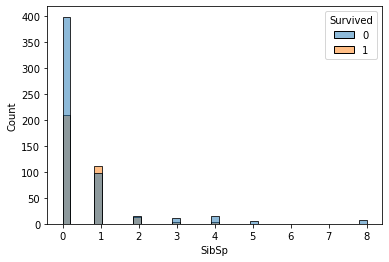

In [203]:
# SibSp 
# train_df['SibSp'].describe() # range 0 - 8, majority 0
sns.histplot(data=train_df, x="SibSp", hue="Survived")
# SibSp == 1|2 survived better

In [204]:
# Skewed classes in SibSp 
for i in range(9):
    print(f"SibSp == {i}: {train_df.loc[train_df['SibSp'] == i, 'SibSp'].count()} entries.")

SibSp == 0: 608 entries.
SibSp == 1: 209 entries.
SibSp == 2: 28 entries.
SibSp == 3: 16 entries.
SibSp == 4: 18 entries.
SibSp == 5: 5 entries.
SibSp == 6: 0 entries.
SibSp == 7: 0 entries.
SibSp == 8: 7 entries.


### Parch / Survived

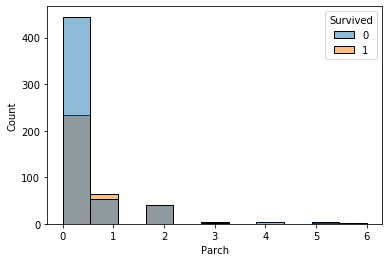

In [205]:
sns.histplot(data=train_df, x="Parch", hue="Survived")
# Parch greater than 0 survived better 

### Fare / Survived

In [206]:
# Fare
print(train_df['Fare'].describe())
# Survived fare stats
print("Survived fare stats:")
print(train_df.loc[train_df['Survived'] == 1, 'Fare'].describe())
# Died fare stats
print("Died fare stats:")
print(train_df.loc[train_df['Survived'] == 0, 'Fare'].describe())
# Survived fare stats are slightly higher but with more std 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
Survived fare stats:
count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64
Died fare stats:
count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64


### Pclass / Survived

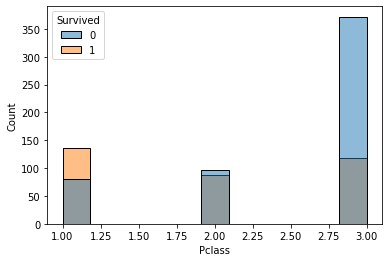

In [207]:
sns.histplot(data=train_df, x='Pclass', hue='Survived')  # Pclass 1 survived most 

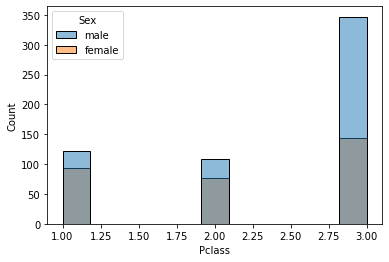

In [208]:
sns.histplot(data=train_df, x='Pclass', hue='Sex') # but there are also more female in higher Pclass

### Sex / Survived

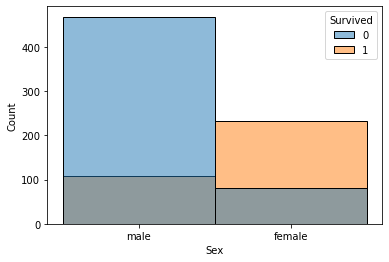

In [209]:
sns.histplot(data=train_df, x='Sex', hue='Survived') # there are more men, but more % women survived

### Embarked / Survived

In [210]:
# need to impute data first 
# sns.histplot(data=train_df, x='Embarked', hue='Survived')
# 'S' has smaller % to survive, 'C' has the greatest percentage to survive

In [240]:
# embarked / sex
# sns.histplot(data=train_df, x='Embarked', hue='Sex')
# there are more % women in 'Q', more than 'C', it suggests that 'C' has effectively higher % of survival independently of Sex 

ValueError: Could not interpret value `Embarked` for parameter `x`

## Missing values 

In [212]:
# numerical features
print("In training set:")
print("N Age missing:", train_df['Age'].isnull().sum()) # 177
print("N SibSp missing:", train_df['SibSp'].isnull().sum())
print("N Parch missing:", train_df['Parch'].isnull().sum())
print("N Fare missing:", train_df['Fare'].isnull().sum())

print("In test set:")
print("N Age missing:", test_df['Age'].isnull().sum()) # 86
print("N SibSp missing:", test_df['SibSp'].isnull().sum())
print("N Parch missing:", test_df['Parch'].isnull().sum())
print("N Fare missing:", test_df['Fare'].isnull().sum()) # 1

In training set:
N Age missing: 177
N SibSp missing: 0
N Parch missing: 0
N Fare missing: 0
In test set:
N Age missing: 86
N SibSp missing: 0
N Parch missing: 0
N Fare missing: 1


In [213]:
# Age: impute mean 
age_mean = train_df["Age"].mean()
train_df["Age"].fillna(age_mean, inplace=True) 
test_df["Age"].fillna(age_mean, inplace=True)

In [214]:
# Fare: impute mean of Pclass group 
fare_by_pclass = train_df.groupby("Pclass")["Fare"].mean()
test_df["Fare"].fillna(test_df.apply(lambda r: fare_by_pclass[r['Pclass']], axis=1), inplace=True)

In [215]:
# categorical features 
print("In training set:")
print("N Pclass missing:", train_df['Pclass'].isnull().sum())
print("N Sex missing:", train_df['Sex'].isnull().sum())
print("N Embarked missing:", train_df['Embarked'].isnull().sum()) # 2

print("In test set:")
print("N Pclass missing:", test_df['Pclass'].isnull().sum())
print("N Sex missing:", test_df['Sex'].isnull().sum())
print("N Embarked missing:", test_df['Embarked'].isnull().sum())

In training set:
N Pclass missing: 0
N Sex missing: 0
N Embarked missing: 2
In test set:
N Pclass missing: 0
N Sex missing: 0
N Embarked missing: 0


In [216]:
# Embarked impute with mode of Pclass group 
train_df.groupby(by="Pclass")["Embarked"].agg(lambda x: x.value_counts(ascending=False).index[0]) # S is the mode 

Pclass
1    S
2    S
3    S
Name: Embarked, dtype: object

In [217]:
train_df["Embarked"].fillna("S", inplace=True)

## Typos and erroneous values

In [218]:
# Age is OK
train_df.loc[(train_df['Age'] < 0) | (train_df['Age'] < 1)] # fractional ages are accepted 
# train_df['Age'].unique()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [219]:
# Fare
train_df.loc[train_df['Fare'] == 0] # 15 entries, fare == 0 means it's invited? but thre are 1st classes! Remove? YES
# Drop Fare == 0
train_df.drop(labels=train_df.loc[train_df['Fare'] == 0].index, axis=0, inplace=True)

In [220]:
# SibSp is OK
train_df['SibSp'].unique()
# Parch is OK
train_df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [221]:
# all OK
train_df['Pclass'].unique()
train_df['Sex'].unique()
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

### Age to AgeGroup

In [222]:
bins = [0,17,26,34,50,63,100]
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins, labels=[0,1,2,3,4,5])
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins, labels=[0,1,2,3,4,5])

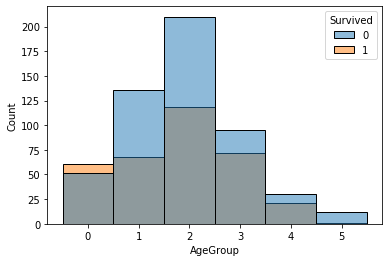

In [223]:
# Survival in age groups 
sns.histplot(data=train_df, x="AgeGroup", hue="Survived")

In [224]:
# % people in AgeGroup
for i in range(6):
    group_i = train_df.loc[train_df["AgeGroup"] == i]
    percent = (group_i['Survived'] == 1).sum() / len(group_i)
    print(f"{percent * 100} % people in AgeGroup {i} survived.")
# AgeGroup 0, 3, 4 have more survival %, the distribution is like a curve 

53.98230088495575 % people in AgeGroup 0 survived.
33.33333333333333 % people in AgeGroup 1 survived.
35.97560975609756 % people in AgeGroup 2 survived.
43.11377245508982 % people in AgeGroup 3 survived.
41.17647058823529 % people in AgeGroup 4 survived.
7.6923076923076925 % people in AgeGroup 5 survived.


### Cabin to HasCabin

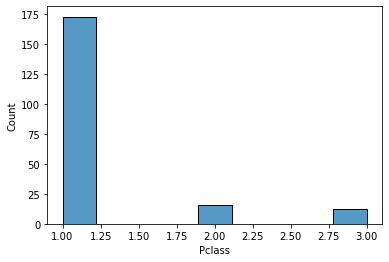

In [225]:
train_df['Cabin'].isnull().sum() # 675 people without cabin 
has_cabin = train_df.loc[train_df['Cabin'].notna()]
sns.histplot(data=has_cabin, x="Pclass")

In [226]:
train_df['HasCabin'] = train_df['Cabin'].notna()
test_df['HasCabin'] = test_df['Cabin'].notna()
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,HasCabin
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,False


### One hot encoding 

One hot encoding to those categorical features that cannot be meaningfully sorted.

In [227]:
# Pclass? In order? NO
# Sex? YES, binary encoding 
train_df['Sex'] = (train_df['Sex'] == 'male').astype(np.int32)

In [228]:
test_df['Sex'] = (test_df['Sex'] == 'female').astype(np.int32)

In [229]:
# AgeGroup? In order? NO
# Embarked? YES, OH encoding 
train_embarked_oh = pd.get_dummies(train_df['Embarked'], prefix="Embarked")
test_embarked_oh = pd.get_dummies(test_df['Embarked'], prefix='Embarked')
train_df = pd.merge(left=train_df, right=train_embarked_oh, left_index=True, right_index=True)
test_df = pd.merge(left=test_df, right=test_embarked_oh, left_index=True, right_index=True)

### Remove unnecessary features 

In [230]:
print(train_df.columns)
# remove Name, Ticket, Cabin, Age, Embarked
train_df = train_df.drop(["Name", "Ticket", "Cabin", "Age", "Embarked"], axis=1)
test_df = test_df.drop(["Name", "Ticket", "Cabin", "Age", "Embarked"], axis=1)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'AgeGroup', 'HasCabin', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


### Remove outliers 

In [231]:
# Scale train
numerical_features = ['SibSp', 'Parch', 'Fare']
num_X = train_df.loc[:, numerical_features]
train_scaled = (num_X - num_X.mean(axis=0)) / num_X.std(axis=0)

In [232]:
# PCA
from sklearn.decomposition import PCA 

pca = PCA() 
X_pca = pca.fit_transform(train_scaled)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

In [233]:
component = "PC3"

idx = X_pca[component].sort_values(ascending=False).index 
train_df.loc[idx, :]
# no immediate outliers

C:\Users\zhuoy\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Survived,Pclass,Sex,SibSp,Parch,Fare,AgeGroup,HasCabin,Embarked_C,Embarked_Q,Embarked_S
667,0.0,2.0,1.0,0.0,0.0,13.0000,1,False,0.0,0.0,1.0
870,1.0,3.0,1.0,1.0,1.0,11.1333,0,False,0.0,0.0,1.0
628,1.0,1.0,0.0,0.0,0.0,77.9583,1,True,0.0,0.0,1.0
601,1.0,2.0,0.0,2.0,1.0,27.0000,1,False,0.0,0.0,1.0
13,0.0,3.0,1.0,0.0,0.0,8.0500,1,False,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,2.0,0.0,0.0,0.0,13.0000,1,False,0.0,0.0,1.0
831,1.0,3.0,0.0,1.0,0.0,14.4542,0,False,1.0,0.0,0.0
319,1.0,1.0,0.0,0.0,2.0,164.8667,2,True,0.0,0.0,1.0
780,1.0,1.0,0.0,0.0,1.0,211.3375,3,True,0.0,0.0,1.0


Series([], Name: Survived, dtype: int64)

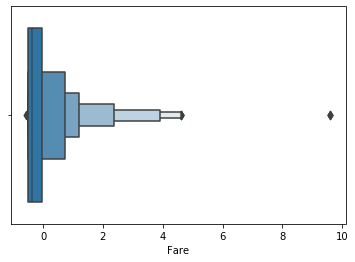

In [242]:
# plot fare distribution with boxen 
sns.boxenplot(x="Fare", data=train_df)
train_df.loc[train_df['Fare'] > 500, 'Survived'] # there are 3 with fare value 512., MUCH more expensive 

In [235]:
# dont remove 
# train_df.drop(train_df.loc[train_df['Fare'] > 500].index, axis=0)

## Normalize and scale data

In [236]:
# Fare
features_to_scale = ['Fare']
mean = train_df[features_to_scale].mean(axis=0)
std = train_df[features_to_scale].std(axis=0)
# scale 
train_df[features_to_scale] = (train_df[features_to_scale] - mean) / std 
test_df[features_to_scale] = (test_df[features_to_scale] - mean) / std 

9.603605010835517

## Save cleaned data

In [238]:
# astype("category") to all categorical features? 
print(train_df.head())
print(test_df.head())

             Survived  Pclass  Sex  SibSp  Parch      Fare AgeGroup  HasCabin  \
PassengerId                                                                     
1                   0       3    1      1      0 -0.510758        1     False   
2                   1       1    0      1      0  0.771528        3      True   
3                   1       3    0      0      0 -0.497241        1     False   
4                   1       1    0      1      0  0.407402        3      True   
5                   0       3    1      0      0 -0.494738        3     False   

             Embarked_C  Embarked_Q  Embarked_S  
PassengerId                                      
1                     0           0           1  
2                     1           0           0  
3                     0           0           1  
4                     0           0           1  
5                     0           0           1  
             Pclass  Sex  SibSp  Parch      Fare AgeGroup  HasCabin  \
PassengerId

count       416
unique        2
top       False
freq        326
Name: HasCabin, dtype: object

In [239]:
train_df.to_csv("cleaned_train.csv", index="PassengerId")
test_df.to_csv("cleaned_test.csv", index="PassengerId")